# Часть 1. Проверка гипотезы в Python и составление аналитической записки

Вы предобработали данные в SQL, и теперь они готовы для проверки гипотезы в Python. Загрузите данные пользователей из Москвы и Санкт-Петербурга c суммой часов их активности из файла yandex_knigi_data.csv. Если работаете локально, скачать файл можно по ссылке.

Проверьте наличие дубликатов в идентификаторах пользователей. Сравните размеры групп, их статистики и распределение.

Напомним, как выглядит гипотеза: пользователи из Москвы проводят в среднем больше времени за чтением и прослушиванием книг в приложении, чем пользователи из Москвы. Попробуйте статистически это доказать, используя одностороннюю проверку гипотезы с двумя выборками:

Нулевая гипотеза $H_0: \mu_{\text{СПб}} \leq \mu_{\text{Москва}}$ <br> Среднее время активности пользователей в Санкт-Петербурге не больше, чем в Москве.

Альтернативная гипотеза $H_1: \mu_{\text{СПб}} > \mu_{\text{Москва}}$ <br> Среднее время активности пользователей в Санкт-Петербурге больше, и это различие статистически значимо.

По результатам анализа данных подготовьте аналитическую записку, в которой опишите:

Выбранный тип t-теста и уровень статистической значимости.

Результат теста, или p-value.

Вывод на основе полученного p-value, то есть интерпретацию результатов.

Одну или две возможные причины, объясняющие полученные результаты.

## Разработка A/B-тестирования и анализ результатов

- Автор: Захаров А.С.
- Дата: 20.04.2025

## Цели и задачи проекта

<font color='#777778'>Цель проекта, проверить гипотезу, что пользователи из Санкт-Петербурга проводят в среднем больше времени за чтением и прослушиванием книг в приложении, чем пользователи из Москвы. </font>

## Описание данных

<font color='#777778'>Данные содержат информацию о пользователях из Москвы и Санкт-Петербурга c их активностью (суммой часов чтения и прослушивания книг в приложении Яндекс Книги). </font>

## Содержимое проекта

<font color='#777778'>Основные шаги проекта:
1. Загрузка данных и знакомство с ними.
    
   1.1 Проверка на наличие дубликатов.
    
   1.2 Сравнение размеров групп и их статистик.
    
   1.3 Проверка распределения данных.

2. Проверка  гипотезы в Pyton/
3. Аналитическая записка.</font>

---

## 1. Загрузка данных и знакомство с ними

Загрузите данные пользователей из Москвы и Санкт-Петербурга c их активностью (суммой часов чтения и прослушивания) из файла `/datasets/yandex_knigi_data.csv`.

In [1]:
import pandas as pd 

In [2]:
# Загрузка датафрейма
df = pd.read_csv('https://code.s3.yandex.net/datasets/yandex_knigi_data.csv')

In [3]:
# Просмотр первых строк датафрейма
display(df.head(5))

,Unnamed: 0,city,puid,hours
0,0,Москва,9668,26.167776
1,1,Москва,16598,82.111217
2,2,Москва,80401,4.656906
3,3,Москва,140205,1.840556
4,4,Москва,248755,151.326434


In [4]:
# Проверка дубликатов по идентификаторам пользователей и городам 
duplicates_by_user = df[df.duplicated(subset=['puid'], keep=False)]

# Вывод результатов
print(f"Общее количество дубликатов по пользователю: {len(duplicates_by_user)}")


Общее количество дубликатов по пользователю: 488


In [5]:
# Проверка дубликатов по идентификаторам пользователей и городам 
duplicates_by_user = df[df.duplicated(subset=['city', 'puid'], keep=False)]

# Вывод результатов
print(f"Общее количество дубликатов по городу и пользователю: {len(duplicates_by_user)}")

Общее количество дубликатов по городу и пользователю: 0


In [6]:
# Фильтрация данных для пользователей из Москвы
moscow = df[df['city'] == 'Москва']

# Фильтрация данных для пользователей из Санкт-Петербурга
spb = df[df['city'] == 'Санкт-Петербург']

In [7]:
# Проверка количества пользователей в каждой группе
print(f"Количество пользователей в Москве: {len(moscow)}")
print(f"Количество пользователей в Санкт-Петербурге: {len(spb)}")

# Вывод статистики по столбцу 'hours' для Москвы
print("Статистики для пользователей в Москве:")
print(moscow['hours'].describe())

# Вывод статистики по столбцу 'hours' для Санкт-Петербурга
print("Статистики для пользователей в Санкт-Петербурге:")
print(spb['hours'].describe())

Количество пользователей в Москве: 6234
Количество пользователей в Санкт-Петербурге: 2550
Статистики для пользователей в Москве:
count    6234.000000
mean       10.881092
std        36.851683
min         0.000018
25%         0.059903
50%         0.924498
75%         5.939972
max       857.209373
Name: hours, dtype: float64
Статистики для пользователей в Санкт-Петербурге:
count    2550.000000
mean       11.592691
std        39.704993
min         0.000025
25%         0.080002
50%         0.984781
75%         6.509072
max       978.764775
Name: hours, dtype: float64


<font color='#777778'>Обе группы демонстрируют очень схожие распределения активности с незначительными отличиями.
Хотя среднее время активности немного выше в Санкт-Петербурге, разница может быть незначима из-за большого разброса в данных.
Максимальные значения указывают на наличие выбросов, которые могут искажать анализ среднего значения. Размеры групп отличаются - Москва: 6234 пользователей, Санкт-Петербург: 2550 пользователей.
Группа в Москве почти в 2.5 раза больше.

In [8]:
import matplotlib.pyplot as plt

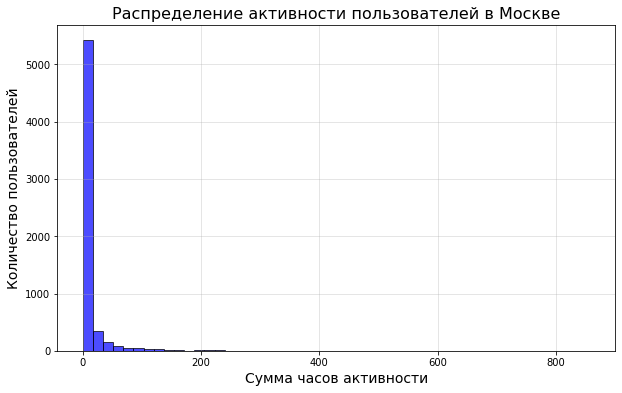

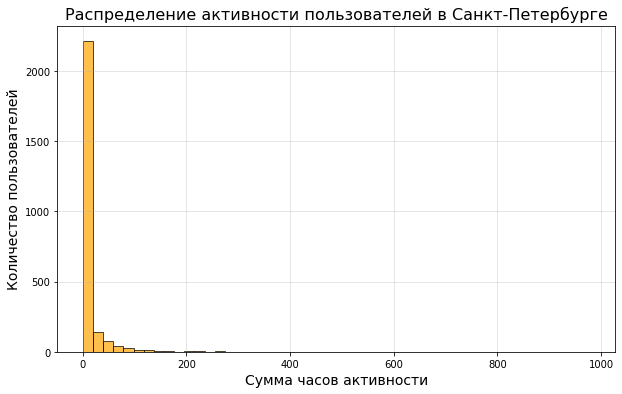

In [9]:
# Построение гистограммы по столбцу 'hours' для Москвы
plt.figure(figsize=(10, 6))
plt.hist(
    moscow['hours'], bins=50, alpha=0.7, color='blue', edgecolor='black'
)
plt.title('Распределение активности пользователей в Москве', fontsize=16)
plt.xlabel('Сумма часов активности', fontsize=14)
plt.ylabel('Количество пользователей', fontsize=14)
plt.grid(alpha=0.4)
plt.show()

# Построение гистограммы по столбцу 'hours' для Санкт-Петербурга
plt.figure(figsize=(10, 6))
plt.hist(
    spb['hours'], bins=50, alpha=0.7, color='orange', edgecolor='black'
)
plt.title('Распределение активности пользователей в Санкт-Петербурге', fontsize=16)
plt.xlabel('Сумма часов активности', fontsize=14)
plt.ylabel('Количество пользователей', fontsize=14)
plt.grid(alpha=0.4)
plt.show()

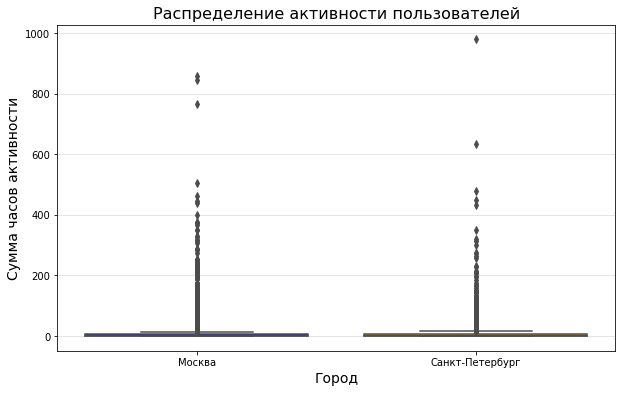

In [10]:
import seaborn as sns

# Построение "коробки с усами"
plt.figure(figsize=(10, 6))
sns.boxplot(x='city', y='hours', data=df, palette={'Москва': 'blue', 'Санкт-Петербург': 'orange'})

# Настройка графика 
plt.title('Распределение активности пользователей', fontsize=16)
plt.xlabel('Город', fontsize=14)
plt.ylabel('Сумма часов активности', fontsize=14)
plt.grid(axis='y', alpha=0.4)
plt.show()

<font color='#777778'>Как видно на графике, в данных с суммой активности присутствую выбросы, которые могут искажать анализ. Следует их исключить.

In [11]:
# Очистка датафрейм от выбросов
df = df[df['hours'] <= df['hours'].quantile(0.99)]

In [12]:
# Фильтрация данных для пользователей из Москвы
moscow = df[df['city'] == 'Москва']

# Фильтрация данных для пользователей из Санкт-Петербурга
spb = df[df['city'] == 'Санкт-Петербург']

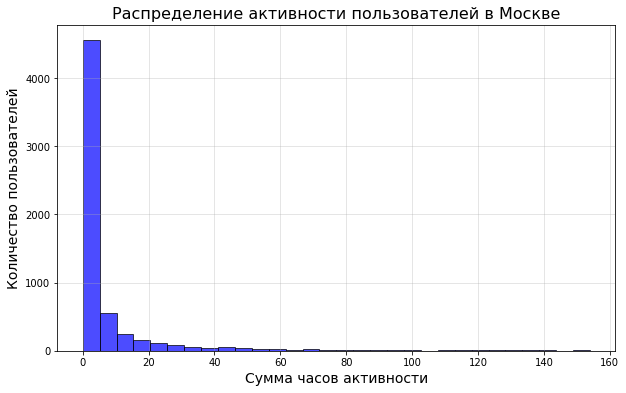

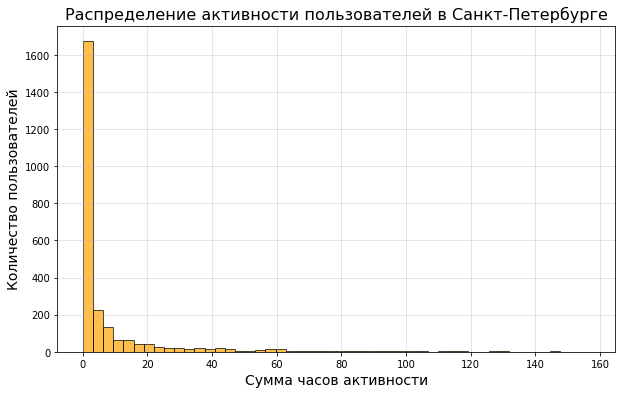

In [13]:
import matplotlib.pyplot as plt

# Построение гистограммы по столбцу 'hours' для Москвы
plt.figure(figsize=(10, 6))
plt.hist(
    moscow['hours'], bins=30, alpha=0.7, color='blue', edgecolor='black'
)
plt.title('Распределение активности пользователей в Москве', fontsize=16)
plt.xlabel('Сумма часов активности', fontsize=14)
plt.ylabel('Количество пользователей', fontsize=14)
plt.grid(alpha=0.4)
plt.show()

# Построение гистограммы по столбцу 'hours' для Санкт-Петербурга
plt.figure(figsize=(10, 6))
plt.hist(
    spb['hours'], bins=50, alpha=0.7, color='orange', edgecolor='black'
)
plt.title('Распределение активности пользователей в Санкт-Петербурге', fontsize=16)
plt.xlabel('Сумма часов активности', fontsize=14)
plt.ylabel('Количество пользователей', fontsize=14)
plt.grid(alpha=0.4)
plt.show()


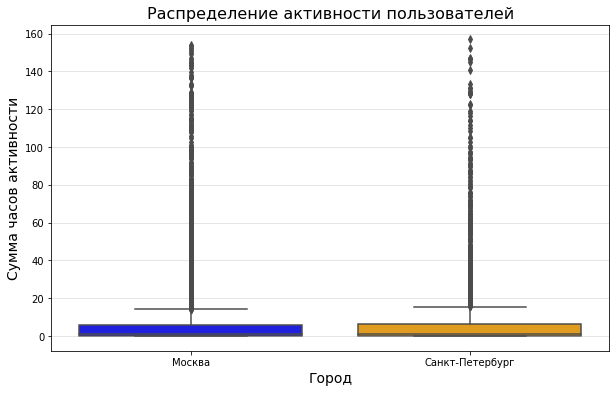

In [14]:
import seaborn as sns

# Построение "коробки с усами" без выбросов
plt.figure(figsize=(10, 6))
sns.boxplot(x='city', y='hours', data=df, palette={'Москва': 'blue', 'Санкт-Петербург': 'orange'})

# Настройка графика
plt.title('Распределение активности пользователей', fontsize=16)
plt.xlabel('Город', fontsize=14)
plt.ylabel('Сумма часов активности', fontsize=14)
plt.grid(axis='y', alpha=0.4)
plt.show()

<font color='#777778'> Согласно графиков, данные для Москвы и Санкт-Петербурга имеют левостороннее распределение и длинные правосторонние хвосты.

## 2. Проверка гипотезы в Python

Гипотеза звучит так: пользователи из Санкт-Петербурга проводят в среднем больше времени за чтением и прослушиванием книг в приложении, чем пользователи из Москвы. Попробуйте статистически это доказать, используя одностороннюю проверку гипотезы с двумя выборками:

- Нулевая гипотеза H₀: Средняя активность пользователей в Санкт-Петербурге не больше, чем в Москве.

- Альтернативная гипотеза H₁: Средняя активность пользователей в Санкт-Петербурге больше, и это различие статистически значимо.

<font color='#777778'> Для проверки гипотезы оптимальным выбором является U-тест Манна-Уитни, т.к. проверяет различие между распределениями двух независимых выборок, не требует нормального распределения и устойчив к выбросам.

In [15]:
from scipy.stats import mannwhitneyu

u_stat, p_value = mannwhitneyu(spb['hours'], moscow['hours'], alternative='greater')

print(f"P-value: {p_value:.4f}")
if p_value < 0.05:
    print("Отклоняем нулевую гипотезу: среднее время активности пользователей в Санкт-Петербурге статистически значимо больше.")
else:
    print("Не отклоняем нулевую гипотезу: среднее время активности пользователей в Санкт-Петербурге не превышает Москву.")

P-value: 0.0824
Не отклоняем нулевую гипотезу: среднее время активности пользователей в Санкт-Петербурге не превышает Москву.


## 3. Аналитическая записка
По результатам анализа данных подготовьте аналитическую записку, в которой опишете:

- Выбранный тип t-теста и уровень статистической значимости.

- Результат теста, или p-value.

- Вывод на основе полученного p-value, то есть интерпретацию результатов.

- Одну или две возможные причины, объясняющие полученные результаты.



<font color='#777778'>Мы использовали U-тест Манна-Уитни для двух независимых выборок, так как анализируем время активности пользователей из двух разных групп: Москва и Санкт-Петербург, распределение данных не является нормальным, и имеются выбросы в данных. Проверка гипотезы была односторонней, так как предполагалось, что пользователи Санкт-Петербурга проводят больше времени за чтением и прослушиванием книг. Уровень статистической значимости был установлен на 0.05, что является стандартным значением в статистических анализах.

P-value равно 0.0824, что выше уровня значимости (0.05), поэтому мы не отклоняем нулевую гипотезу. Это означает, что среднее время активности пользователей в Санкт-Петербурге не статистически значимо превышает время активности пользователей в Москве.

Результаты t-теста показывают, что разница в средних значениях времени активности между группами не подтверждается статистически. 

Возможно, пользователи в обоих городах проявляют одинаковый интерес к чтению и прослушиванию книг, что отражается в схожих данных.

# Часть 2. Анализ результатов A/B-тестирования

Теперь вам нужно проанализировать другие данные. Представьте, что к вам обратились представители интернет-магазина BitMotion Kit, в котором продаются геймифицированные товары для тех, кто ведёт здоровый образ жизни. У него есть своя целевая аудитория, даже появились хиты продаж: эспандер со счётчиком и напоминанием, так и подстольный велотренажёр с Bluetooth.

В будущем компания хочет расширить ассортимент товаров. Но перед этим нужно решить одну проблему. Интерфейс онлайн-магазина слишком сложен для пользователей — об этом говорят отзывы.

Чтобы привлечь новых клиентов и увеличить число продаж, владельцы магазина разработали новую версию сайта и протестировали его на части пользователей. По задумке, это решение доказуемо повысит количество пользователей, которые совершат покупку.

Ваша задача — провести оценку результатов A/B-теста. В вашем распоряжении:

* данные о действиях пользователей и распределении их на группы,

* техническое задание.

Оцените корректность проведения теста и проанализируйте его результаты.

## 1. Опишите цели исследования.



<font color='#777778'> Цель исследования: оценить, повысит ли новая версия сайта онлайн-магазина BitMotion Kit количество пользователей, которые совершат покупку.

## 2. Загрузите данные, оцените их целостность.


In [16]:
#Загрузка данных
participants = pd.read_csv('https://code.s3.yandex.net/datasets/ab_test_participants.csv')
events = pd.read_csv('https://code.s3.yandex.net/datasets/ab_test_events.zip',
                     parse_dates=['event_dt'], low_memory=False)

In [17]:
# Просмотр первых строк датафрейма
display(participants.head(5))

,user_id,group,ab_test,device
0,0002CE61FF2C4011,B,interface_eu_test,Mac
1,001064FEAAB631A1,B,recommender_system_test,Android
2,001064FEAAB631A1,A,interface_eu_test,Android
3,0010A1C096941592,A,recommender_system_test,Android
4,001E72F50D1C48FA,A,interface_eu_test,Mac


In [18]:
# Просмотр первых строк датафрейма
display(events.head(5))

,user_id,event_dt,event_name,details
0,GLOBAL,2020-12-01 00:00:00,End of Black Friday Ads Campaign,ZONE_CODE15
1,CCBE9E7E99F94A08,2020-12-01 00:00:11,registration,0.0
2,GLOBAL,2020-12-01 00:00:25,product_page,NaN
3,CCBE9E7E99F94A08,2020-12-01 00:00:33,login,NaN
4,CCBE9E7E99F94A08,2020-12-01 00:00:52,product_page,NaN


In [19]:
print("Пропущенные значения в participants:")
print(participants.isnull().sum())

print("Пропущенные значения в events:")
print(events.isnull().sum())


Пропущенные значения в participants:
user_id    0
group      0
ab_test    0
device     0
dtype: int64
Пропущенные значения в events:
user_id            0
event_dt           0
event_name         0
details       538264
dtype: int64


<font color='#777778'>Пропущенные значения встречаются только в столбце 'details' с дополнительными данные о событии, что не оказывает влияния на проведение данного A/B теста.

In [20]:
print(f"Количество дубликатов в participants: {participants.duplicated().sum()}")
print(f"Количество дубликатов в events: {events.duplicated().sum()}")

Количество дубликатов в participants: 0
Количество дубликатов в events: 36318


In [21]:
# Посчитаем дубликаты по каждому столбцу
duplicate_counts = {col: events.duplicated(subset=[col]).sum() for col in events.columns}

# Выведем результаты
for col, count in duplicate_counts.items():
    print(f"Количество дубликатов в столбце '{col}': {count}")


Количество дубликатов в столбце 'user_id': 643102
Количество дубликатов в столбце 'event_dt': 180713
Количество дубликатов в столбце 'event_name': 787278
Количество дубликатов в столбце 'details': 787116


In [22]:
# Удаляем полные дубликаты
events_clean = events.drop_duplicates()

# Проверяем количество удалённых строк
duplicates = len(events) - len(events_clean)

# Вычисляем процент удалённых строк
percent = (duplicates / len(events)) * 100

# Вывод результата
print(f"Удалено {duplicates} полных дубликатов ({percent:.2f}% от общего числа строк).")

Удалено 36318 полных дубликатов (4.61% от общего числа строк).


<font color='#777778'>Дубликаты встречаются только в датафрейме events, что логично, т.к. один пользователь может совершать несколько событий в разные временные промежутки. Полные дубликаты в событиях исключены

<font color='#777778'>Пропущенные значения встречаются только в столбце 'details' с дополнительными данные о событии, что не оказывает влияния на проведение данного A/B теста.

## 3. По таблице `ab_test_participants` оцените корректность проведения теста:

   3\.1 Выделите пользователей, участвующих в тесте, и проверьте:

   - соответствие требованиям технического задания,

   - равномерность распределения пользователей по группам теста,

   - отсутствие пересечений с конкурирующим тестом (нет пользователей, участвующих одновременно в двух тестовых группах).

In [23]:
# Фильтрация пользователей, участвующих в тесте interface_eu_test
test_participants = participants[participants['ab_test'] == 'interface_eu_test']
display(test_participants.head(10))

,user_id,group,ab_test,device
0,0002CE61FF2C4011,B,interface_eu_test,Mac
2,001064FEAAB631A1,A,interface_eu_test,Android
4,001E72F50D1C48FA,A,interface_eu_test,Mac
5,002412F1EB3F6E38,B,interface_eu_test,Mac
6,002540BE89C930FB,B,interface_eu_test,Android
7,0031F1B5E9FBF708,A,interface_eu_test,Android
8,003346BB64227D0C,B,interface_eu_test,Android
10,00341D8401F0F665,B,interface_eu_test,iPhone
11,0036BE15EE4D319D,A,interface_eu_test,PC
13,003F86A34B575D27,A,interface_eu_test,Android


In [24]:
#Проверка, что пользователи разделены на две группы
print(test_participants['group'].value_counts())

B    5467
A    5383
Name: group, dtype: int64


<font color='#777778'> Можно сделать вывод, что в данных присутствуют только тестируемые группы А и В.

In [25]:
#Проверка распределения по группам
group_sizes = test_participants['group'].value_counts(normalize=True) * 100
print("Распределение по группам (%):")
print(group_sizes)

Распределение по группам (%):
B    50.387097
A    49.612903
Name: group, dtype: float64


<font color='#777778'> Разница распределения посетителей между группами составляет 0.77%. Это означает, что группы распределены равномерно.

In [26]:
# Проверка пользователей, которые присутствуют одновременно в группах A и B
duplicate_users = test_participants.groupby('user_id')['group'].nunique()
overlap_users = duplicate_users[duplicate_users > 1]

# Вывод результатов
print(f"Количество пользователей, одновременно находящихся в группах A и B: {len(overlap_users)}")
if len(overlap_users) > 0:
    print("Примеры пользователей с пересечением групп:")
    print(overlap_users.head())


Количество пользователей, одновременно находящихся в группах A и B: 0


<font color='#777778'> Пересечений пользователей в группах не обнаружено, что говорит о независимости выборок.

In [27]:
# Фильтрация пользователей, попавших в группы B
group_B_users = participants[participants['group'] == 'B']

# Проверка, есть ли пользователи, участвующие в двух тестах одновременно
duplicate_B_users = group_B_users[group_B_users.duplicated(subset=['user_id'], keep=False)]

# Исключение этих пользователей из test_participants
test_participants_clean = test_participants[~test_participants['user_id'].isin(duplicate_B_users['user_id'])]

# Проверяем, сколько пользователей было удалено
removed_users = len(test_participants) - len(test_participants_clean)
print(f"Удалено {removed_users} пользователей, попавших в группу B в двух тестах сразу.")


Удалено 116 пользователей, попавших в группу B в двух тестах сразу.


3\.2 Проанализируйте данные о пользовательской активности по таблице `ab_test_events`:

- оставьте только события, связанные с участвующими в изучаемом тесте пользователями;

In [28]:
# Объединение с таблицей с информацией по событиям 
filtered_events = events_clean.merge(test_participants_clean[['user_id']], on='user_id', how='inner')

# Просмотр датафрейма
display(filtered_events.tail(15))

,user_id,event_dt,event_name,details
72920,B1D88FBD4BA58E1B,2020-12-23 23:44:47,registration,0.0
72921,B1D88FBD4BA58E1B,2020-12-23 23:50:45,login,NaN
72922,B1D88FBD4BA58E1B,2020-12-23 23:51:28,product_page,NaN
72923,38CA3A3C4FE3FEFD,2020-12-23 23:47:47,login,NaN
72924,38CA3A3C4FE3FEFD,2020-12-23 23:47:47,registration,-1.71
72925,38CA3A3C4FE3FEFD,2020-12-23 23:48:53,login,NaN
72926,38CA3A3C4FE3FEFD,2020-12-23 23:48:55,product_page,NaN
72927,38CA3A3C4FE3FEFD,2020-12-24 05:48:54,product_cart,NaN
72928,38CA3A3C4FE3FEFD,2020-12-24 05:49:55,product_page,NaN
72929,38CA3A3C4FE3FEFD,2020-12-24 05:51:23,product_cart,NaN


- определите горизонт анализа: рассчитайте время (лайфтайм) совершения события пользователем после регистрации и оставьте только те события, которые были выполнены в течение первых семи дней с момента регистрации;

In [29]:
# Выделение событий регистрации пользователей
registration_events = filtered_events[filtered_events['event_name'] == 'registration'][['user_id', 'event_dt']]
registration_events = registration_events.rename(columns={'event_dt': 'registration_dt'})

In [30]:
# Объединением данных регистрации с основными событиями
filtered_events = filtered_events.merge(registration_events, on='user_id', how='left')

# Расчёт времени совершения события от регистрации до события
filtered_events['lifetime_days'] = (pd.to_datetime(filtered_events['event_dt']) - pd.to_datetime(filtered_events['registration_dt'])).dt.days

# Фильтрация событий, произошедших в течение первых семи дней с момента регистрации
filtered_events_within_seven_days = filtered_events[filtered_events['lifetime_days'] <= 6]

In [31]:
# Исключение лишних столбцов
filtered_events_within_seven_days = filtered_events_within_seven_days[['user_id', 'event_dt', 'event_name', 'details', 'lifetime_days']]

# Вывод результата для проверки
display(filtered_events_within_seven_days.head(15))

,user_id,event_dt,event_name,details,lifetime_days
0,5F506CEBEDC05D30,2020-12-06 14:10:01,registration,0.0,0
1,5F506CEBEDC05D30,2020-12-07 01:25:14,login,NaN,0
2,5F506CEBEDC05D30,2020-12-07 01:25:47,login,NaN,0
3,5F506CEBEDC05D30,2020-12-09 12:40:49,login,NaN,2
4,5F506CEBEDC05D30,2020-12-09 12:40:49,product_page,NaN,2
5,5F506CEBEDC05D30,2020-12-10 23:18:00,product_page,NaN,4
6,51278A006E918D97,2020-12-06 14:37:25,registration,-3.8,0
7,51278A006E918D97,2020-12-07 01:49:18,login,NaN,0
8,51278A006E918D97,2020-12-07 01:49:19,login,NaN,0
9,51278A006E918D97,2020-12-09 02:12:06,product_cart,NaN,2


Оцените достаточность выборки для получения статистически значимых результатов A/B-теста. Заданные параметры:

- базовый показатель конверсии — 30%,

- мощность теста — 80%,

- достоверность теста — 95%.

In [32]:
from statsmodels.stats.power import NormalIndPower
import math

# Задание параметры
alpha = 0.05  # Уровень значимости (достоверность 95%)
power = 0.8  # Мощность теста
baseline_conversion = 0.30  # Базовая конверсия (30%)
mde = 0.03  # Минимальный детектируемый эффект (3%)

# Расчёт конверсии
p1 = baseline_conversion
p2 = baseline_conversion + mde

# Средняя конверсия между двумя группами
p = (p1 + p2) / 2

# Размер эффекта
effect_size = abs(p1 - p2) / math.sqrt(p * (1 - p))

# Инициализируем анализатор мощности
power_analysis = NormalIndPower()

# Расчёт размера выборки
sample_size = power_analysis.solve_power(
    effect_size=effect_size,
    power=power,
    alpha=alpha,
    ratio=1  # Равномерное распределение выборок
)

print(f"Необходимый размер выборки для каждой группы: {int(sample_size)}")


Необходимый размер выборки для каждой группы: 3763


<font color='#777778'> Размер выборки для каждой группы достаточен для получения статистически значимых результатов (группа А - 5383 посетителя, группа В - 5467 посетителя).

- рассчитайте для каждой группы количество посетителей, сделавших покупку, и общее количество посетителей.

In [33]:
# Объединение данных участников теста и событий
merged_data = events.merge(test_participants[['user_id', 'group']], on='user_id', how='inner')

# Расчёт общего количества уникальных посетителей для каждой группы
total_visitors = merged_data.groupby('group')['user_id'].nunique()

# Расчёт количества покупателей для каждой группы
buyers = merged_data[merged_data['event_name'] == 'purchase'].groupby('group')['user_id'].nunique()

# Создание итоговой таблицы
summary = pd.DataFrame(
    {'Visitors': total_visitors,
    'Buyers': buyers}).reset_index()

# Расчёт конверсии
summary['Conversion'] = round((summary['Buyers'] / summary['Visitors']) * 100, 1)

# Просмотр результата
print(summary)


  group  Visitors  Buyers  Conversion
0     A      5383    1766        32.8
1     B      5467    1931        35.3


- сделайте предварительный общий вывод об изменении пользовательской активности в тестовой группе по сравнению с контрольной.

<font color='#777778'>
В тестовой группе B было 5467 посетителей, что немного больше, чем 5383 в контрольной группе A.    
Тестовая группа B привлекла 1931 покупателя, в то время как контрольная группа A — 1766 покупателей.
Количество пользователей, сделавших покупку, выше в тестовой группе, что подтверждает рост активности.

    
В тестовой группе B конверсия составляет 35.3%, что выше, чем 32.8% в контрольной группе A.
Это свидетельствует о положительном изменении активности пользователей, участвующих в тесте. 
Заметно, что фактический прирост конверсии в 2,5% не соответствует запланированному приросту в 3%, поэтому эффект от изменений есть, но недостаточно высокий.

## 4. Проведите оценку результатов A/B-тестирования:

- Проверьте изменение конверсии подходящим статистическим тестом, учитывая все этапы проверки гипотез.

<font color='#777778'>Для проверки влияния нового интерфейса на конверсию пользователей в покупателей мы определим нулевую и альтернативную гипотезы:

Нулевая гипотеза: Конверсия в группе B не превышает конверсию в группе A или разница составляет менее 3 процентных пунктов.

Альтернативная гипотеза: Конверсия в группе B значимо выше, чем в группе A, минимум на 3 процентных пункта.

In [34]:
from statsmodels.stats.proportion import proportions_ztest

In [35]:
# Извлекаем данные, ставим группу B на первое место
counts = summary.set_index("group").loc[['B', 'A'], "Buyers"].values  # Количество покупателей
nobs = summary.set_index("group").loc[['B', 'A'], "Visitors"].values  # Количество посетителей

In [36]:
# Проведение Z-теста с односторонней альтернативной гипотезой
z_stat, p_value = proportions_ztest(counts, nobs, alternative='larger')

In [37]:
# Вывод результатов
print(f"P-значение: {p_value:.5f}")

if p_value < 0.05:
    print("Результаты теста статистически значимы: конверсии между группами различаются.")
else:
    print("Результаты теста не статистически значимы: конверсии между группами не различаются.")

P-значение: 0.00287
Результаты теста статистически значимы: конверсии между группами различаются.


- Опишите выводы по проведённой оценке результатов A/B-тестирования. Что можно сказать про результаты A/B-тестирования? Был ли достигнут ожидаемый эффект в изменении конверсии?

<font color='#777778'>
Конверсия в тестовой группе (B) выше, чем в контрольной (A):

Группа A: конверсия 32.8% (1766 покупателей из 5383 посетителей).

Группа B: конверсия 35.3% (1931 покупатель из 5467 посетителей).

Разница составляет +2.5 процентных пункта, что указывает на положительное влияние тестируемого изменения.

Ожидался рост конверсии минимум на 3 процентных пункта, а фактически наблюдается увеличение на 2.5 процентных пункта.

Несмотря на небольшое недостижение целевого прироста, эффект всё же существенный и статистически значимый.

Рекомендации:

Так как тест показал положительное влияние на конверсию, можно рассмотреть возможность масштабирования изменений.